In [3]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()
import modern_robotics as mr
import numpy as np
from Utilities.symbolicFunctions import exp6, Ad
from Utilities.kukaKinematics import Blist

### Functions & variables from former tasks

#### Jacobi and decoupling

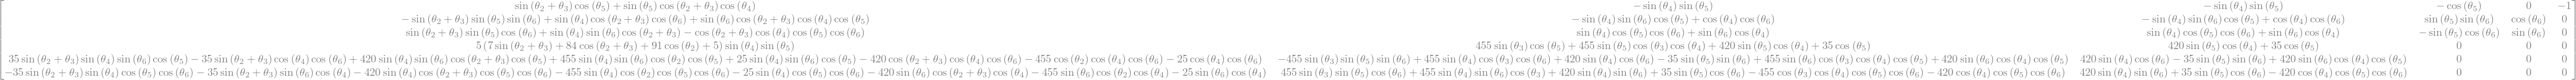

In [4]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')

def Jb_maker6x6(Blist): #Foreløpig for 6x6
    Jb = sp.zeros(6,6)
    Jb[:,5] =  Blist[:,5]
    Jb[:,4] =  Ad(exp6(-Blist[:,5], th6)) * Blist[:,4]
    Jb[:,3] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5)) * Blist[:,3]
    Jb[:,2] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4)) * Blist[:,2]
    Jb[:,1] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4) * exp6(-Blist[:,2], th3)) * Blist[:,1]
    Jb[:,0] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4) * exp6(-Blist[:,2], th3) * exp6(-Blist[:,1], th2)) * Blist[:,0]
    
    return Jb

Jb = Jb_maker6x6(Blist)
Jb.simplify()
Jb

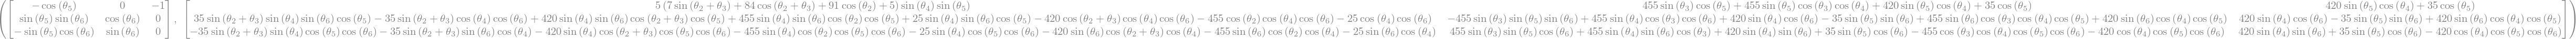

In [5]:
#Jb = [[Jb11, Jb12],
#      [Jb21, Jb22]]
JbArm = sp.zeros(3,3)   
JbWrist = sp.zeros(3,3) 

JbWrist = Jb[0:3,3:6]  # Jb12 (rotation)
JbArm = Jb[3:6,0:3]    # Jb21 (position)

JbArm.simplify()
JbWrist.simplify()

JbWrist, JbArm

### Wrist:

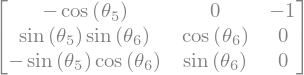

In [6]:
JbWrist

In [7]:
DetJbWrist = JbWrist.det()
DetJbWrist


In [8]:
sp.solve(DetJbWrist, th4, th5)

### Arm:

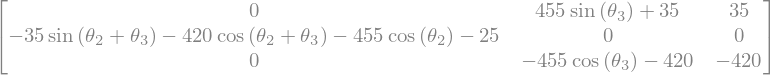

In [9]:
detArm = JbArm.det()
simplJbArm = JbArm.subs({th1:0, th4:0, th5:0, th6:0}) # Simplifying the expression to shorten calculation time
simplJbArm

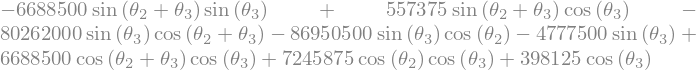

In [10]:
detSimplJbArm = simplJbArm.det()
detSimplJbArm.simplify()


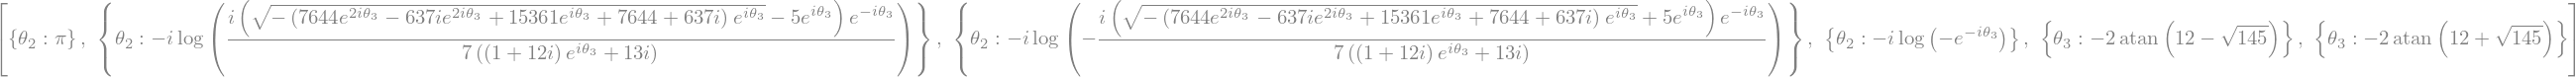

In [11]:
sp.solve(detSimplJbArm, th2, th3, dict = True)


In [12]:
t = -2*np.arctan(12-np.sqrt(145))
# t = np.rad2deg(t)
t

In [13]:
t = -2*np.arctan(12+np.sqrt(145))
t = np.rad2deg(t)
t

In [14]:
360+t